<a href="https://colab.research.google.com/github/dsarj/tcc_previsao_pulsares/blob/main/pulse_star_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import files
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [59]:
# Lendo arquivo csv tratado
data = files.upload()

Saving pulsar_data_train_clean_2.csv to pulsar_data_train_clean_2 (1).csv


In [101]:
# Obtendo o dataframe do arquivo lido
pulse_star_train = pd.read_csv(next(iter(data.keys())))

ps_df_train = pulse_star_train.copy()

0.0    11375
1.0     1153
Name: is_pulse_star, dtype: int64


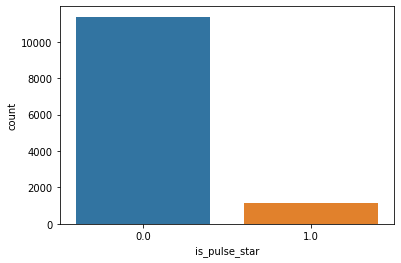

In [102]:
# Verificando balanceamento das classes
print(ps_df_train.is_pulse_star.value_counts())
ax = sns.countplot(x="is_pulse_star", data=ps_df_train)

In [103]:
# Preparando o train test split
X=ps_df_train.drop("is_pulse_star",axis=1)
y=ps_df_train["is_pulse_star"]


In [104]:
# Aplicando o BorderlineSMOTE para balanceamento das classes
bsmt = BorderlineSMOTE()
X, y = bsmt.fit_resample(X,y)

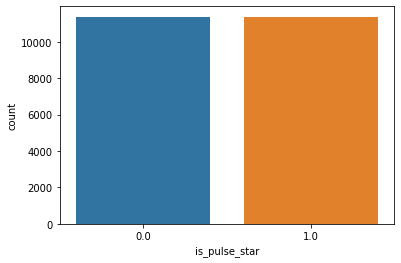

In [105]:
# Verificando balanceamento após Balanceamento
ax = sns.countplot(x=y)

In [106]:
# Aplicando o train test split com 70% da base para treinamento
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 18, test_size = 0.3, stratify=y)


In [108]:
# RANDOM FOREST REGRESSOR
# Método que calcula acurácia do RANDOM FOREST REGRESSOR recebendo um n_estimators
def calculateAccuracyRF(num_estimators):  
  
  forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=18)
  forest_model.fit(train_X, train_y)

  y_pred_train = forest_model.predict(val_X)

  fm_score = forest_model.score(val_X, val_y)

  print(fm_score)

  acuracia = accuracy_score(val_y, np.round(abs(y_pred_train)), normalize=True, sample_weight=None)

  cmrf = confusion_matrix(val_y,np.round(abs(y_pred_train)))

  print("Acurácia do teste: {:.2f}%".format(acuracia * 100))
  print(classification_report(val_y,np.round(abs(y_pred_train))))
  print("----------------------------------------------------")  
  
  disp = ConfusionMatrixDisplay(cmrf).plot(cmap=plt.cm.YlGn) 

In [ ]:
# Verificando que quanto menor o numero de estimators maior a precisao do teste
# Vou usar estimators entre 1 e 5
for n_estimat in [1,2,3,4,5]:
  print("N_Estimator: {}".format(n_estimat)) 
  calculateAccuracyRF(n_estimat)

In [96]:
# Calcula acurácia de um modelo, dados suas predicoes e validações
def calculateAccuracy(y_pred_train, val_y):
  acuracia = accuracy_score(val_y, np.round(abs(y_pred_train)), normalize=True)

  print("Acurácia do teste: {:.2f}%".format(acuracia * 100))
  cm = confusion_matrix(val_y,np.round(abs(y_pred_train)))

  print(classification_report(val_y,np.round(abs(y_pred_train))))
  disp = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Greens)
  
  print("----------------------------------------------------")


In [ ]:
# Modelo de ÁRVORE DE DECISÃO
decision_tree_model = DecisionTreeRegressor(
    random_state = 10
)

decision_tree_model.fit(train_X, train_y)

y_pred_train_dec_tree = decision_tree_model.predict(val_X)

dtm_score = decision_tree_model.score(val_X, val_y)

print(dtm_score)

calculateAccuracy(y_pred_train_dec_tree, val_y)

In [ ]:
# Modelo REGRESSÃO LOGÍSTICA
model_reg_log = LogisticRegression(
    multi_class = 'multinomial',
    fit_intercept = False
)
model_reg_log.fit(train_X, train_y)

y_pred_train_reg_log = model_reg_log.predict(val_X)

mrl_score = model_reg_log.score(val_X, val_y)

print(mrl_score)

calculateAccuracy(y_pred_train_reg_log, val_y)

In [ ]:
# Modelo de REGRESSÃO LINEAR

linear_regression_model = LinearRegression()#make_pipeline(StandardScaler(with_mean=True), LinearRegression())#LinearRegression()

linear_regression_model.fit(train_X, train_y)

y_pred_train_lin_reg = linear_regression_model.predict(val_X)

lrm_score = linear_regression_model.score(val_X, val_y)

print(lrm_score)

calculateAccuracy(y_pred_train_lin_reg, val_y)